# Modeling an Optimal Classifier to iterate over Features of an unanalyzed Thin-Layer Chromatography Plate Image and generate a Mask of the Image Data Extraction.
By Ian Michael Bollinger

Cabrini University MCIS600 CAPSTONE PROJECT

Submitted On: 2022/11/18

# Introduction & Motivation
There are both limiations and benefits to utilizing human senses as a source of scientific data. Humanity benefits from higher-order thinking, imagination, and pattern-finding in our native scientific analysis abilities. Limitations arise when it comes to the objectivity of those analyses, bringing into question sublte subjective differences in these native analyses that can compound cause data to become junk. Utilizing instrumentation, computers, and machine learning in tandem to human analysis and training helps to provide all the benefits of complex learning and pattern solving with precise observations and fine tuning.

Thin-Layer Chromatography (TLC) is a early 20th century technology thought to be first utilized by Mikhail Tsvet developed around basic chemistry and physics to separate compounds (chlorophylls, xanthophylls, etc) from plant extracts[1]. Typically only used to qualitatively determine the presence or absence of compounds due to the subjective and limited nature of human observation; modern works in Human-Machine interfaces are proposing the posibility of developing procedures that can allow objective quantiation of compounds outside human observational scopes[2].

The motivation for this project is centered in the work I do professionally: scientific data analysis. The proposed project will take image data generated by Thin-Layer Chromatography (TLC) and user marked regions of those images to train a ML algorithm to be able differentiate and eventually automate those region selections. The purpose of this is to develop a step along fully automated processing of TLC image data to then produce readable and interpretable reports describing how the compounds are separated and their profiles described.

To generate these reports, Key Features of the TLC Plate Image are needed: the Area of Analysis (AOA) from the plate needs to be determined as it is the main area analytical data will be generated from. We are able to generate/predict the AOA based on some 'atomic' Key Features: non-plate background (BG); plate area (PA)' pencil markings (PM), which are typically broken into Sample Load Line (SLL) & the Mobile Phase Solvent Front (MPSF); and distinct Sample Compounds in Lane (SCL). These data points are then used to generate the AOA for data extraction.

[1]: M.S. Tswett and the Invention of Chromatography https://alfresco-static-files.s3.amazonaws.com/alfresco_images/pharma/2014/08/22/e5b0c0c2-2e1c-463d-8d4f-4993f7245f47/article-56954.pdf

[2]: A Toolkit to Quantify Target Compounds in Thin Layer Chromatography Experiments doi.org/10.26434/chemrxiv.5917330.v2


# The Hurdle
How can we leverage ML algorithms to perform Image Key Feature of Analysis pre-screening of TLC Plate Images instead of having an analyist define those Image Features manually?

# Proposed Solution
The focus of this project is to take user generated 'masks' that highlight each type of content (BGs, PAs, PMs, and SCLs), feed it into a different Machine Learning Classifiers, and predict a mask for a user submitted image based on the Optimal Model found. New data can be submitted as either a training or testing sample. For training, images are added to the database, each image has a fourty-two (42) different features including Gaussian Blurs and a semi-robust Gabor Features[3] kernel, then those features folded into each of the nine (9) ML Classifier Models: Decision Tree, Random Forest, Gradient Boosted Trees, K-Nearest Neighbor,Linear Support Vector Machine, Multi-Layer Perceptron, AdaBoost, Gaussian Naive Bayes, and Quadratic Discriminant Analysis; with the Optimal Model getting pickled after metric and important feature review. For testing, a previously pickled model can be loaded and utlized to generate a mask of the image based on that Optimal Model.

All the saved Image files (Training, Training Masks, Testing, and Feature-Segmented-Masks) exist as the full-database for this project. They will be both pulled during generation of new models, but also stored as a reference for analyst review of in-vivo accruacy of model predictions.

This project's modeling will be used to determine the best modeling approach for Database building based on training from 1000's of Human Sementation Mask generation I am outsourcing to the public. The Model & Database will become the key component in the Report Generation Pipeline to form Chromatograms from TLC-Plates based on (x,y,r,g,b,a) pixel data within AOAs.

[3]: What are Gabor filters? "Gabor is a bandpass filter that can be used to extract texture, orientation and other relevant information from your images." https://www.youtube.com/watch?v=QEz4bG9P3Qs

# Analysis Metrics
To determine the Optimal Model we will be looking comparing the following Classifiers:

    Decision Tree
    
    Random Forest
    
    Gradient Boosted Trees
    
    K-Nearest Neighbor
    
    Linear Support Vector Machine
    
    Multi-Layer Perceptron
    
    AdaBoost
    
    Gaussian Naive Bayes
    
    Quadratic Discriminant Analysis

With the Follwing Bechmark Metrics:
    
    Mean Squared Error (MSE) to determine the statistical significance of Features
    
    R-Squared for Model Correlation Strength or goodness-of-fit
    
    Model Predictive Accuracy as most important benchmark of an Optimal Model

Then we will investigate the most influential features on the Highest Accuracy Model based on these features. These outputs of each Model will then be reviwed by an analyst and determine if the Accuracy and Feature-Segmented-Masks represent real data or are junk-output.

To further determine the validity of the output data we will compare it to an OpenCV Deep Neural Net (DNN)'s Mask and then contrast the number of SCL's (marked here as 'centroids') each model is capable of detecting compared to the maximum possible number. The final output of Model Accuracy will be the major focus of the discussion in the conclusion. 

# IMPLEMENTATION
UPDATE MODELS BASED ON CURRENT TRAINING IMAGES, DETERMINE OPTIMAL MODEL AND MAKE PREDICTION
    
    Step 0: Import Libraries & Define Functions
    
    Step 1: Read the Training Images and Extract their Features
    
    Step 2: Read Labeled Images (Masks of the Training Images) & Create Mask Dataframe
    
    Step 3: Get Data ready for Modeling by Concatonating Datasets
    
    Step 4: Build all Classifiers and Fit the Models Using Training Data
    
    Step 5: Generating Metrics for the All Models: Accuracy, Mean-Squared Error, & R-Squared
    
# RESULTS
PRESENT AND DISCUSS MODEL OUTPUTS AND COMPARE THE OPTIMAL MODEL TO OPENCV-DNN

    Step 6: Present Optimal Model based on Performance & Display Optmial Model Important Features
    
    Step 7: Save Optimal Model for Future Use
    
    Step 8: Have Optimal Model Make Predictions on Test Images & Save Optimal Prediction-based Mask Image
    
    Step 9: Have OpenCV Deep Neural Net Make Predictions on Test Images & Save Prediction-based Mask Image
    
    Step 10: Compare Centroid Calls between Optimal MOdel and OpenCV DNN

## Step 0: Import Libraries & Define Functions

In [1]:
%matplotlib inline

# Initial Import List
import cv2
import fnmatch
import ipyplot
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
from scipy import ndimage as nd
from skimage.filters import roberts, sobel, scharr, prewitt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Set the Starting Directory
starting_dir = os.getcwd()

# Establish Random Seed
random_seed = 25

# Function to check if image is grayscale, and if not, try convert it or raise exception
def grayscale_check(input_img):
    if input_img.ndim == 3 and input_img.shape[-1] == 3:
        label = cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
    elif input_img.ndim == 2:
        label = input_img
    else:
        raise Exception('The module works only with grayscale and RGB images!')
    return label

# Function to extract features from an image and return it as a dataframe
def feature_extraction(img, name):
    df = pd.DataFrame()
    
    # Add original pixel values to the data frame first Feature
    original_reshape = img.reshape(-1)
    df['Original_Image'] = original_reshape
    df['Image_Name'] = name   #Capture image name as we read multiple images
    
    # Generate Gabor Features
    num = 1 # to count numbers up in order to give Gabor Features a label in the data frame
    kernels = []
    for theta in range(2): # Define the number of thetas
        theta = theta / 4 * np.pi
        for sigma in (1,3): # Sigma values 1 & 3
            for lamda in np.arange(0, np.pi, np.pi/4): # Range of wavelengths
                for gamma in (0.05, 0.5): # Gamma values of 0.05 & 0.5
                    gabor_label = 'Gabor_' + str(num) # Label Gabor Columns as Gabor#
                    ksize = 5
                    kernel = cv2.getGaborKernel((ksize,ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
                    kernels.append(kernel)
                    
                    # Now filter the image and add values to a new column
                    fimg = cv2.filter2D(original_reshape, cv2.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df[gabor_label] = filtered_img # Labels Columns appropriately
                    #print(f'{gabor_label} : theta={theta} : sigma={sigma} : lamda={lamda} : gamma={gamma}')
                    num += 1 # Increment count for column labeling
    
    # Generate Canny Edge Feature
    edges = cv2.Canny(img, 100, 200)
    edges1 = edges.reshape(-1)
    df['Canny_Edge'] = edges1
    
    # Generate Roberts Edge Feature
    edge_roberts = roberts(img)
    edge_roberts1 = edge_roberts.reshape(-1)
    df['Roberts'] = edge_roberts1
    
    # Generate Sobel Edge Feature
    edge_sobel = sobel(img)
    edge_sobel1 = edge_sobel.reshape(-1)
    df['Sobel'] = edge_sobel1
    
    # Generate Scharr Edge Feature
    edge_scharr = scharr(img)
    edge_scharr1 = edge_scharr.reshape(-1)
    df['Scharr'] = edge_scharr1
    
    # Generate Prewitt Edge Feature
    edge_prewitt = prewitt(img)
    edge_prewitt1 = edge_prewitt.reshape(-1)
    df['Prewitt'] = edge_prewitt1
    
    # Generate Gaussian with sigma = 3 Feature  
    gaussian_img = nd.gaussian_filter(img, sigma= 3 )
    gaussian_img1 = gaussian_img.reshape(-1)
    df['Gaussian_s3'] = gaussian_img1
    
    # Generate Gaussian with sigma = 7 Feature
    gaussian_img2 = nd.gaussian_filter(img, sigma= 7 )
    gaussian_img3 = gaussian_img2.reshape(-1)
    df['Gaussian_s7'] = gaussian_img3
    
    # Generate Median with sigma = 3 Feature
    median_img = nd.median_filter(img, size= 3 )
    median_img1 = median_img.reshape(-1)
    df['Median_s3'] = median_img1
    return df

# Function to display all images in a given Folder
def display_dir_images(inputFolder):
    # Reset to Starting Dir, then move to Input Folder and Set it as Working Dir
    os.chdir(starting_dir)
    os.chdir(inputFolder)
    curring_working_dir = os.getcwd()
    # Generate Blank Lists to
    images_array = []
    images_names = []
    for x in os.listdir():
        if x.endswith(".png"):
            # Prints only text file present in My Folder
            x_png_path = f'{curring_working_dir}\{x}'
            x_png_path = x_png_path.replace('\\','/')
            images_array.append(x_png_path)
            images_names.append(x)
    ipyplot.plot_images(images_array, images_names, force_b64=True)
    os.chdir(starting_dir)

## Step 1: Read the Training Images and Extract their Features

Step 1 Complete - Dataset Training Complete



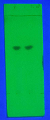
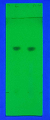
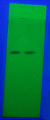
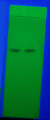
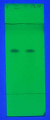
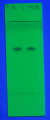
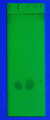
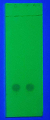


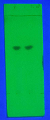
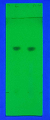
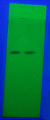
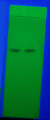
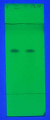
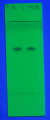
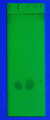
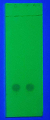

In [2]:
###############################################################################
# Step 1: Read the Training Images and Extract their Features
###############################################################################
train_dataset = pd.DataFrame() # Dataframe to capture Image Features

# Set the Training Image Path
train_path = './Plate Images/Training/'
for file in os.listdir(train_path): # Iterate through each file to perform some action
    if '.png' in file or '.jpg' in file: # Ignore any Non-PNG/JPEG files
        df = pd.DataFrame() # Temporary dataframe to capture info for each image in the loop
        input_img = cv2.imread(train_path + file) # Load the color image
        img = grayscale_check(input_img) # Check if the input image is RGB or grey and convert to gry if RGB
        df = feature_extraction(img, file) # Call Feature Extraction Function
        train_dataset = pd.concat([train_dataset, df]) # Update Train dataframe with all the info from each image
    else:
        pass
print('Step 1 Complete - Dataset Training Complete')
# Display the Test Plate Images
display_dir_images(train_path)

## Step 2: Read Labeled Images (Masks of the Training Images) & Create Mask Dataframe


Step 2 Complete - Label Reading Complete



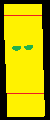
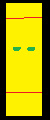
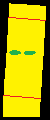
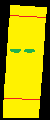
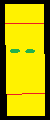
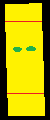
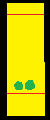
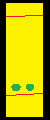


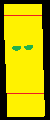
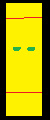
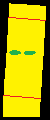
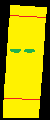
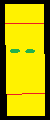
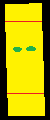
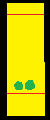
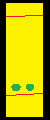

In [3]:
###############################################################################
# Step 2: Read Labeled Images (Masks of the Training Images) & Create Mask Dataframe
############################################################################### 
mask_dataset = pd.DataFrame()  # Dataframe to capture mask info

# Set the Training Mask Image Path
mask_path = './Plate Images/Training Masks/'    
for mask in os.listdir(mask_path): # Iterate through each file to perform some action
    if '.png' in mask or '.jpg' in file: # Ignore any Non-PNG/JPEG files
        df2 = pd.DataFrame()  # Temporary dataframe to capture info for each mask in the loop
        input_mask = cv2.imread(mask_path + mask)# Load the mask
        label = grayscale_check(input_mask) # Check if the input mask is RGB or grey and convert to grey if RGB

        #Add pixel values to the data frame
        label_values = label.reshape(-1)
        df2['Label_Value'] = label_values
        df2['Mask_Name'] = mask
        mask_dataset = pd.concat([mask_dataset, df2])  # Update mask dataframe with all the info from each mask
    else:
        pass
print('\nStep 2 Complete - Label Reading Complete')
# Display the Test Plate Images
display_dir_images(mask_path)

## Step 3: Get Data ready for Modeling by Concatonating Datasets

In [4]:
###############################################################################
# Step 3: Get Data ready for Modeling by Concatonating Datasets
###############################################################################
dataset = pd.concat([train_dataset, mask_dataset], axis=1) #Concatenate both image and mask datasets

# Image and Mask names are the same sanity check
dataset['Image_Name'].equals(dataset['Mask_Name'])   

# Assign training features to X & Drop columns that are not relevant for training (non-features)
X = dataset.drop(labels = ['Image_Name', 'Mask_Name', 'Label_Value'], axis=1) 

# Assign label values to Y (our prediction)
Y = dataset['Label_Value'].values 

# Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = random_seed)
print('\nStep 3 Complete - Dataset split into Training & Testing; ready for Modeling')


Step 3 Complete - Dataset split into Training & Testing; ready for Modeling


## Step 4: Build all Classifiers and Fit the Models Using Training Data

In [5]:
%%capture --no-display
###############################################################################
# Step 4: Build All Classifier Models and Fit them Using Training Data
###############################################################################
# Build Model List
model_list = ['Decision Tree', 'Random Forest', 'Gradient Boosted Trees',
              'K-Nearest Neighbor','Linear Support Vector Machine','Multi-Layer Perceptron',
              'AdaBoost', 'Gaussian Naive Bayes', 'Quadratic Discriminant Analysis']

# Instantiate Models
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators = 100, random_state = random_seed)
gbt_model = GradientBoostingClassifier(n_estimators = 100, random_state = random_seed)
knn_model = KNeighborsClassifier(3)
l_svm_model = SVC(kernel="linear", C=0.025, random_state = random_seed)
mlp_model = MLPClassifier(alpha=1, max_iter=1000, random_state = random_seed)
ab_model = AdaBoostClassifier(random_state = random_seed)
gnb_model = GaussianNB()
qda_model = QuadraticDiscriminantAnalysis()

# Train Models on training data
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gbt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
l_svm_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)
ab_model.fit(X_train, y_train)
gnb_model.fit(X_train, y_train)
qda_model.fit(X_train, y_train)

print('\nStep 4 Complete - All Models Fit to Training Data')

## Step 5: Generating Metrics for the All Models: Accuracy, Mean-Squared Error, & R-Squared

In [6]:
###############################################################################
# Step 5: Generating Metrics for the All Models: Accuracy, Mean-Squared Error, & R-Squared
###############################################################################
y_pred_dt = dt_model.predict(X_test)
acc_dt = np.round(metrics.accuracy_score(y_test, y_pred_dt),4)
mse_dt = np.round(metrics.mean_squared_error(y_test, y_pred_dt), 2)
r2_dt = np.round(metrics.r2_score(y_test, y_pred_dt), 3)

y_pred_rf = rf_model.predict(X_test)
acc_rf = np.round(metrics.accuracy_score(y_test, y_pred_rf),4)
mse_rf = np.round(metrics.mean_squared_error(y_test, y_pred_rf), 2)
r2_rf = np.round(metrics.r2_score(y_test, y_pred_rf), 3)

y_pred_gbt = gbt_model.predict(X_test)
acc_gbt = np.round(metrics.accuracy_score(y_test, y_pred_gbt),4)
mse_gbt = np.round(metrics.mean_squared_error(y_test, y_pred_gbt), 2)
r2_gbt = np.round(metrics.r2_score(y_test, y_pred_gbt), 3)

y_pred_knn = knn_model.predict(X_test)
acc_knn = np.round(metrics.accuracy_score(y_test, y_pred_knn),4)
mse_knn = np.round(metrics.mean_squared_error(y_test, y_pred_knn), 2)
r2_knn = np.round(metrics.r2_score(y_test, y_pred_knn), 3)

y_pred_l_svm = l_svm_model.predict(X_test)
acc_l_svm = np.round(metrics.accuracy_score(y_test, y_pred_l_svm),4)
mse_l_svm = np.round(metrics.mean_squared_error(y_test, y_pred_l_svm), 2)
r2_l_svm = np.round(metrics.r2_score(y_test, y_pred_l_svm), 3)

y_pred_mlp = mlp_model.predict(X_test)
acc_mlp = np.round(metrics.accuracy_score(y_test, y_pred_mlp),4)
mse_mlp = np.round(metrics.mean_squared_error(y_test, y_pred_mlp), 2)
r2_mlp = np.round(metrics.r2_score(y_test, y_pred_mlp), 3)

y_pred_ab = ab_model.predict(X_test)
acc_ab = np.round(metrics.accuracy_score(y_test, y_pred_ab),4)
mse_ab = np.round(metrics.mean_squared_error(y_test, y_pred_ab), 2)
r2_ab = np.round(metrics.r2_score(y_test, y_pred_ab), 3)

y_pred_gnb = gnb_model.predict(X_test)
acc_gnb = np.round(metrics.accuracy_score(y_test, y_pred_gnb),4)
mse_gnb = np.round(metrics.mean_squared_error(y_test, y_pred_gnb), 2)
r2_gnb = np.round(metrics.r2_score(y_test, y_pred_gnb), 3)

y_pred_qda = qda_model.predict(X_test)
acc_qda = np.round(metrics.accuracy_score(y_test, y_pred_qda),4)
mse_qda = np.round(metrics.mean_squared_error(y_test, y_pred_qda), 2)
r2_qda = np.round(metrics.r2_score(y_test, y_pred_qda), 3)

# RESULTS
## Step 6: Present Optimal Model based on Performance & Display Optmial Model Important Features

In [7]:
###############################################################################
# Step 6: Present Optimal Model based on Performance & Display Optmial Model Important Features
###############################################################################
# Display Model Performance
print('Model Metric Comparisons')
performance_df = pd.DataFrame([[acc_dt, mse_dt, r2_dt],
                               [acc_rf, mse_rf, r2_rf],
                               [acc_gbt, mse_gbt, r2_gbt],
                               [acc_knn, mse_knn, r2_knn],
                               [acc_l_svm, mse_l_svm, r2_l_svm],
                               [acc_mlp, mse_mlp, r2_mlp],
                               [acc_ab, mse_ab, r2_ab],
                               [acc_gnb, mse_gnb, r2_gnb],
                               [acc_qda, mse_qda, r2_qda]],
                              columns = ['Accuracy', 'MSE', 'R^2'], index = model_list)

# Sort the list based on highest Accuracy then Display them all
performance_df = performance_df.sort_values('Accuracy', ascending = False)
performance_df

Model Metric Comparisons


,Accuracy,MSE,R^2
Random Forest,0.9823,1.07,1.000
Gradient Boosted Trees,0.9760,1.74,1.000
K-Nearest Neighbor,0.9743,1.90,1.000
Decision Tree,0.9703,1.93,1.000
Multi-Layer Perceptron,0.9665,2.81,1.000
Linear Support Vector Machine,0.9597,3.40,1.000
AdaBoost,0.9256,7.47,0.999
Gaussian Naive Bayes,0.1304,15.32,0.998
Quadratic Discriminant Analysis,0.0282,23.78,0.998


In [8]:
# Display Optimal Model's Important Features
features_list = list(X.columns)
high_acc_name = performance_df.index[0]
if high_acc_name == 'Single Decision Tree':
    high_acc_model = dt_model
elif high_acc_name == 'Random Forest':
    high_acc_model = rf_model
elif high_acc_name == 'Gradient Boosted Trees':
    high_acc_model = gbt_model
elif high_acc_name == 'K-Nearest Neighbor':
    high_acc_model = knn_model
elif high_acc_name == 'Linear Support Vector Machine':
    high_acc_model = l_svm_model
elif high_acc_name == 'Multi-Layer Perceptrons':
    high_acc_model = mlp_model
elif high_acc_name == 'AdaBoost':
    high_acc_model = ab_model
elif high_acc_name == 'Gaussian Naive Bayes':
    high_acc_model = gnb_model
elif high_acc_name == 'Quadratic Discriminant Analysis':
    high_acc_model = qda_model
print(f'\nStep 6 Complete - Optimal Model: {high_acc_name}')
print(f"Top Five (5) Most Influential Features contributing to the {high_acc_name} Highest Model Accuracy")
feature_importance_df = pd.DataFrame(high_acc_model.feature_importances_, index=features_list, columns = ['Feature Score'])
feature_importance_df.sort_values(by = 'Feature Score', ascending=False, inplace = True)
feature_importance_df.head(5)


Step 6 Complete - Optimal Model: Random Forest
Top Five (5) Most Influential Features contributing to the Random Forest Highest Model Accuracy


,Feature Score
Median_s3,0.152795
Gaussian_s7,0.101705
Original_Image,0.072122
Gabor_4,0.067864
Gabor_8,0.063821


## Step 7: Save Optimal Model for Future Use

In [9]:
###############################################################################
# Step 7: Save Optimal Model for Future Use
###############################################################################
import pickle
model_name = f'./Notebook Files/TLC_{high_acc_name}_Model'
pickle.dump(high_acc_model, open(model_name, 'wb'))
print(f'\nStep 7 Complete - {model_name} Saved')


Step 7 Complete - ./Notebook Files/TLC_Random Forest_Model Saved


## Step 8: Have Optimal Model Make Predictions on Test Images & Save Optimal Prediction-based Mask Image


Step 8 Complete - Optimal Prediction-based Mask Images Generated



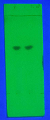
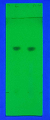
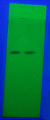
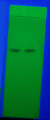
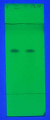
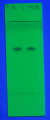
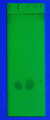
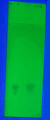
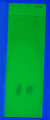
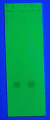
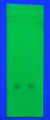
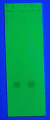
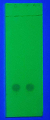
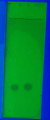
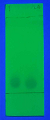
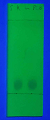
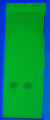


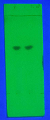
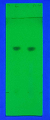
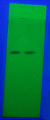
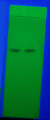
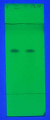
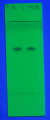
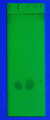
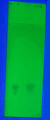
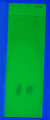
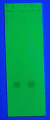
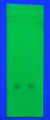
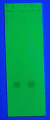
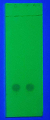
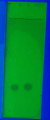
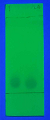
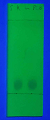
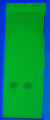

In [10]:
###############################################################################
# Step 8: Have Optimal Model Make Predictions on Test Images & Save Optimal Prediction-based Mask Image
###############################################################################
filename = model_name

load_model = pickle.load(open(filename, 'rb'))

# For each PNG File in Test Folder Predict, Generate, and Save a Mask Image
test_path = 'Plate Images/Test/' # Path of the Images to be Tested
expected_centroid_count = len(fnmatch.filter(os.listdir(test_path), '*.*'))*2 # Used for Comparative Analysis
optimal_centroid_count = 0
for file in os.listdir(test_path):
    if '.png' in file or '.jpg' in file: # Ignore any Non-PNG/JPEG files
        raw_image = cv2.imread(test_path + file) # Load the Color Image to Predict
        img = grayscale_check(raw_image) # Check if the input mask is RGB or grey and convert to grey if RGB
        X = feature_extraction(img, file) # Extract the Features of the given Image
        X = X.drop(columns=['Image_Name'])
        result = load_model.predict(X) # Use the saved Model to Predict a Mask Image
        optimal_mask = result.reshape((img.shape)) # Reshape the Mask Image to the Original Image shape

        #plt.imsave('./Plate Images/Optimal_Mask/'+file,optimal_mask, cmap='jet', format='png') # Save the Mask Image
        
        # Load mask binary image, Gaussian blur, grayscale, Otsu's threshold
        blur = cv2.GaussianBlur(optimal_mask, (3,3), 0)
        #plt.imsave('./Plate Images/Optimal_Mask/Optimal_Mask_Blur/'+file,blur, cmap='jet', format='png') # Save the Mask Image
        
        thresh = cv2.threshold(blur, 150, 200, cv2.THRESH_BINARY_INV)[1] #+ cv2.THRESH_OTSU)[1]
        #plt.imsave('./Plate Images/Optimal_Mask/Optimal_Mask_Thresh/'+file,thresh, cmap='jet', format='png') # Save the Mask Image

        # Perform connected component labeling
        n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=4)
        
        # Create false color image with black background and colored objects
        colors = np.random.randint(0, 255, size=(n_labels, 3), dtype=np.uint8)
        colors[0] = [0, 0, 0]  # black background
        false_colors = colors[labels]
        
        # Obtain centroids
        false_colors_centroid = false_colors.copy()
        for centroid in centroids:
            cv2.drawMarker(false_colors_centroid, (int(centroid[0]), int(centroid[1])),
                           color=(255, 255, 255), markerType=cv2.MARKER_CROSS)

        # Remove small objects
        MIN_AREA = 10
        MAX_AREA = 1000
        false_colors_area_filtered = false_colors.copy()
        for i, centroid in enumerate(centroids[1:], start=1):
            area = stats[i, 4]
            if area > MIN_AREA and area < MAX_AREA:
                optimal_centroid_count = optimal_centroid_count+1
                cv2.drawMarker(false_colors_area_filtered, (int(centroid[0]), int(centroid[1])),
                               color=(255, 255, 255), markerType=cv2.MARKER_CROSS)
        #plt.imsave('./Plate Images/Optimal_Mask/Optimal_Mask_Filt_Cent/'+file,false_colors_area_filtered, cmap='jet', format='png') # Save the Mask Image
        plt.imsave('./Plate Images/Optimal_Mask/'+file,false_colors_area_filtered, cmap='jet', format='png') # Save the Mask Image
    else:
        pass
print('\nStep 8 Complete - Optimal Prediction-based Mask Images Generated')
# Display the Test Plate Images
display_dir_images(test_path)


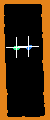
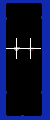
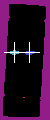
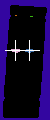
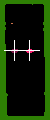
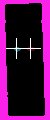
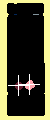
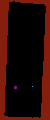
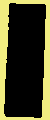
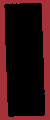
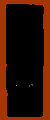
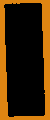
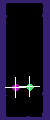
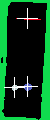
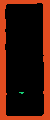
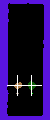
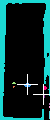


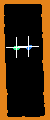
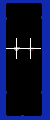
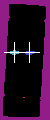
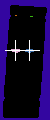
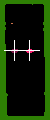
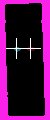
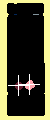
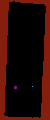
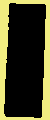
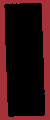
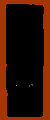
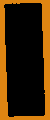
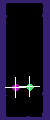
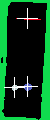
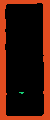
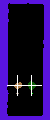
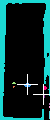

In [11]:
# Display the Test Plate Images
display_dir_images('./Plate Images/Optimal_Mask')

## Step 9: Have OpenCV Deep Neural Net Make Predictions on Test Images & Save Prediction-based Mask Image


Step 9 Complete - OpenCV DNN Prediction-based Mask Images Generated



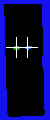
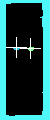
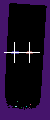
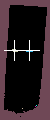
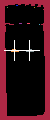
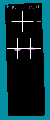
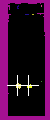
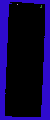
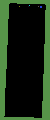
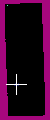
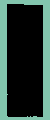
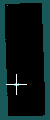
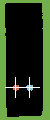
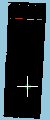
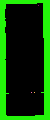
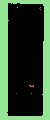
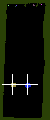


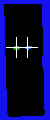
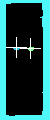
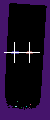
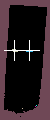
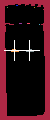
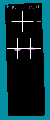
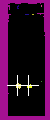
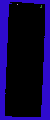
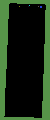
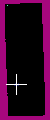
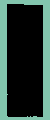
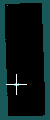
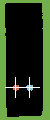
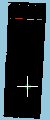
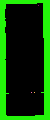
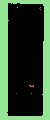
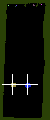

In [13]:
###############################################################################
# Step 9: Utilize OpenCV Deep Nural Network to generate a Mask from Test Images & Save Prediction-based Mask Image
###############################################################################
import os
import cv2

# For each PNG File in Test Folder Predict, Generate, and Save a Mask Image
test_path = 'Plate Images/Test/' # Path of the Images to be Tested
dnn_centroid_count = 0
for file in os.listdir(test_path):
    if '.png' in file or '.jpg' in file: # Ignore any Non-PNG/JPEG files
        raw_image = cv2.imread(test_path + file) # Load the Color Image to Predict
        (H, W) = raw_image.shape[:2]
        mean_pixel_values= np.average(raw_image, axis = (0,1))
        blob = cv2.dnn.blobFromImage(raw_image, scalefactor=0.7, size=(W, H), # MANUALLY ADJUSTED
                                     #mean=(mean_pixel_values[0], mean_pixel_values[1], mean_pixel_values[2]), #B: 78, G: 141, R: 2
                                     #mean=(105, 117, 123), # MANUALLY ADJUSTED THRESHOLDS FOR EACH BGR PIXEL
                                     mean=(mean_pixel_values[0], mean_pixel_values[1], 123), # MANUALLY ADJUSTED
                                     swapRB= False, crop=False)
        
        #View image after preprocessing (blob)
        dnn_blob = np.moveaxis(blob[0,:,:,:], 0,2)
        dnn_blob = (dnn_blob).astype("uint8")
        gray = grayscale_check(dnn_blob) # Check if the input mask is RGB or grey and convert to grey if RGB
        thresh = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
   
        # Perform connected component labeling
        n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=4)

        # Create false color image with black background and colored objects
        colors = np.random.randint(0, 255, size=(n_labels, 3), dtype=np.uint8)
        colors[0] = [0, 0, 0]  # black background
        false_colors = colors[labels]

        # Obtain centroids
        false_colors_centroid = false_colors.copy()
        for centroid in centroids:
            cv2.drawMarker(false_colors_centroid, (int(centroid[0]), int(centroid[1])),
                           color=(255, 255, 255), markerType=cv2.MARKER_CROSS)

        # Remove small objects
        MIN_AREA = 10
        MAX_AREA = 1000
        false_colors_area_filtered = false_colors.copy()
        for i, centroid in enumerate(centroids[1:], start=1):
            area = stats[i, 4]
            if area > MIN_AREA and area < MAX_AREA:
                dnn_centroid_count = dnn_centroid_count+1
                cv2.drawMarker(false_colors_area_filtered, (int(centroid[0]), int(centroid[1])),
                               color=(255, 255, 255), markerType=cv2.MARKER_CROSS)
        plt.imsave('./Plate Images/OpenCV_Mask/'+file,false_colors_area_filtered, cmap='jet', format='png') # Save the Mask Image
    else:
        pass
print('\nStep 9 Complete - OpenCV DNN Prediction-based Mask Images Generated')
# Display the Test Plate Images
display_dir_images('./Plate Images/OpenCV_Mask/')

## Step 10: Compare Centroid Calls between Optimal MOdel and OpenCV DNN

In [23]:
# Gather Pertinent Values together for Analysis: Expected Centroid Count, False Positives, False Negatives, and Accuracy
print('Expected Centroid Count:', expected_centroid_count)
false_pos = [1, 2] # OpenCV, Optimal
dnn_corret = dnn_centroid_count-false_pos[0]
optimal_correct = optimal_centroid_count-false_pos[1]
dnn_acc = np.round(dnn_corret/expected_centroid_count, 2)
false_neg = [expected_centroid_count-dnn_corret, expected_centroid_count-optimal_correct] # OpenCV, Optimal
optimal_acc = np.round(optimal_correct/expected_centroid_count, 2)

# Load All Data into a Dataframe
d = {'Model Name' : ['OpenCV DNN', high_acc_name],
     'Centroid Calls (Desire Higher Calls)' : [dnn_centroid_count, optimal_centroid_count],
     'False Positives (Desire Lower False+)' : [false_pos[0],false_pos[1]],
     'False Negatives (Desire Lower False-)' : [false_neg[0],false_neg[1]],
     'Correct Centroid Calls (Desire Higher Correct Calls)' : [dnn_corret,optimal_correct],
     'Accuracy (Desire Higher Acc.)' : [dnn_acc,optimal_acc]}
optimal_dnn_comp_df = pd.DataFrame(d)
optimal_dnn_comp_df = optimal_dnn_comp_df.set_index(optimal_dnn_comp_df.columns[0])
optimal_dnn_comp_df = optimal_dnn_comp_df.sort_values('Accuracy (Desire Higher Acc.)', ascending = False) # Sort with most Accurate being first
print('\nStep 10: Compare Centroid Calls between Optimal Model and OpenCV DNN')
optimal_dnn_comp_df

Expected Centroid Count: 34

Step 10: Compare Centroid Calls between Optimal Model and OpenCV DNN


,Centroid Calls (Desire Higher Calls),False Positives (Desire Lower False+),False Negatives (Desire Lower False-),Correct Centroid Calls (Desire Higher Correct Calls),Accuracy (Desire Higher Acc.)
Model Name,,,,,
OpenCV DNN,22,1,13,21,0.62
Random Forest,23,2,13,21,0.62


# Conclusion
Comment on the quality of your results.
With the limited dataset of images to work with I feel the results of the project to be very insightful and the code relevant enough to become a benchmark for our initial datapipeline. I was not only able to process an incoming image into fourty-two (42) parsable feature-rich-data for nine (9) different Sci-Kit ML Classifiers to work with and attempt to generate a 'Segmented Mask' representing the Key Features of Analysis.

An issue that will definitely play a role in the ML model accuracy is inconsistent lighting of the TLC Plate Image. This will cause colors to become inconsistent as well and skew some of the feature's from the training model. This could be approach from at least three (3) different angles: 1) by having a large enough training set that has enough variation in lighting to account for this, 2) have a consistent lighting for all samples, or 3) have a color correction pallete included in the Image and have the image digitally adjusted. 

Below you will find how I plan on implementing Human Mask Collection. The GUI and process are going to be maintained; however, there are two major changes I plan on making in this application:

    1) Implement a more robust Human Mask Drawing Process

    2) Create a ML-Human Correction Process where-in the ML Model will generate a Mask and then a Human Corrects that Mask and ranks on a scale of 1-10 how much extra effort they had to put in to correct the ML-Mask. This will then be fed back into the ML Model to help improve it over time (similar to how CAPTCHA croudsources better analytics).

# FUTURE IMPLEMENTATIONS
## COMPILE TRAINING DATA SET AND MASKS FOR MODELING

    Step 0: Import Libraries & Define Functions *WORK IN PROGRESS*

    Step 1: Develop GUI Workspace for Human Mask Development *WORK IN PROGRESS*

    Step 2: Load Raw Image of TLC Plate *WORKING*

    Step 3a: Have User Generate Mask for the Raw Plate Image *WORK IN PROGRESS*

    Step 3b: Have ML Algorithm Generate Mask for the Raw Plate Image *UNFINISHED*

    Step 4: Save Mask and Image to appropriate Training and Training Mask Folders *UNFINISHED*

## Step 0: Import Libraries & Define Functions *WORK IN PROGRESS*

## Step 1: Develop GUI Workspace for Human Mask Development *WORK IN PROGRESS*

In [ ]:
###############################################################################
# Step 0: Import Libraries & Define Functions *WORKING*
###############################################################################

# Load Machine Learning Database CSV
import pandas as pd
import cv2
import tkinter as tk
from tkinter import filedialog as fd
from tkinter import ttk

# Function to Select a File
def select_image():
    global filename
    filename = fd.askopenfilename(
        title='Please Select a TLC Plate Image to Analyze',
        initialdir='./Plate Images/Training/',
        filetypes=(
            ('PNG files', '*.png'),
            ('JPG files', '*.jpg'),
            ('All files', '*.*')))
    currentData.at[0,'IMGPATH'] = filename

# Function to load the ML Data Base
def load_database():
    try:
        global TLC_ML_DB
        TLC_ML_DB = pd.read_csv('./Notebook Files/TLC_ML_DB.csv')
        global currentData
        currentData = pd.DataFrame().reindex_like(TLC_ML_DB)
    except ValueError:
        tk.messagebox.showerror('Information','The File you have chosen is invalid')
    except FileNotFoundError:
        tk.messagebox.showeffor('Information',f'No such file as {filename}')
    clear_database()    
    dataView['column'] = list(currentData.columns)
    dataView['show'] = 'headings'
    for column in dataView['column']:
        dataView.heading(column, text=column)
    dataFrameRows = currentData.to_numpy().tolist()
    for row in dataFrameRows:
        dataView.insert('','end',  values=row)
    return(currentData)

def update_dataview():
    clear_database()    
    dataView['column'] = list(currentData.columns)
    dataView['show'] = 'headings'
    for column in dataView['column']:
        dataView.heading(column, text=column)
    dataFrameRows = currentData.to_numpy().tolist()
    for row in dataFrameRows:
        dataView.insert('','end',  values=row)

def update_dataframe():
    global TLC_ML_DB
    global currentData
    TLC_ML_DB = pd.concat([TLC_ML_DB,currentData])
    TLC_ML_DB.to_csv(index=False)
        
# Function to clear the data view's current Data Base
def clear_database():
    dataView.delete(*dataView.get_children())
    
# Function to display the coordinates of the points clicked on the image
def collect_data(inptRange):
    # Setting necessary globals for input managment
    global inputRange    
    inputRange = inptRange
    global img
    img = cv2.imread(filename, 1)
    global lClickCount
    lClickCount = 0

    # Displaying the image
    cv2.imshow('image', img)

    # Setting mouse handler for the image and calling the click_event() function
    cv2.setMouseCallback('image', click_event)
    
    # Wait for a key to be pressed to exit
    cv2.waitKey(0)
 
    # Close the window
    cv2.destroyAllWindows()     
    
def click_event(event, x, y, flags, params):
    global lClickCount
    # Checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
        lClickCount = lClickCount + 1
        xb = x-4
        yb = y-4
        xc = x+4
        yc = y+4
        # Displaying the coordinates on the Shell
        currentCoords = str(x) + ',' + str(y)
        rectBCoords = str(xb) + ',' + str(yb)
        rectCCoords = str(xc) + ',' + str(yc)
        #print(f'A: {currentCoords}\nB: {rectBCoords}\nC: {rectCCoords}')
        
        # Saving coords to the currentData dataframe
        if inputRange == 'BG':
            print('DO BG CLICK UPDATE')
            displayColor = (49, 125, 237)
            if lClickCount == 1:
                currentData.at[0,'BG1'] = currentCoords
            elif lClickCount == 2:
                currentData.at[0,'BG2'] = currentCoords
                lClickCount = 0
        elif inputRange == 'MPSF':
            print('DO MPSF CLICK UPDATE')
            displayColor = (49, 125, 237)
            if lClickCount == 1:
                currentData.at[0,'MPSF1'] = currentCoords
            elif lClickCount == 2:
                currentData.at[0,'MPSF2'] = currentCoords
                lClickCount = 0
        elif inputRange == 'SLL':
            print('DO SLL CLICK UPDATE')
            displayColor = (0, 192, 255)
            if lClickCount == 1:
                currentData.at[0,'SLL1'] = currentCoords
            elif lClickCount == 2:
                currentData.at[0,'SLL2'] = currentCoords
                lClickCount = 0
        elif inputRange == 'SCL':
            print('DO SCL CLICK UPDATE')
            displayColor = (255, 255, 255)
            if lClickCount == 1:
                currentData.at[0,'SCL1'] = currentCoords
            elif lClickCount == 2:
                currentData.at[0,'SCL2'] = currentCoords
            elif lClickCount == 3:
                currentData.at[0,'SCL3'] = currentCoords
            elif lClickCount == 4:
                currentData.at[0,'SCL4'] = currentCoords
            elif lClickCount == 5:
                currentData.at[0,'SCL5'] = currentCoords
            elif lClickCount == 6:
                currentData.at[0,'SCL6'] = currentCoords
                lClickCount = 0 
        # Displaying a 9x9 rectangle around Area of Analysis (AOA)
        cv2.rectangle(img, (xb, yb), (xc, yc), displayColor, 2)
        cv2.imshow('image', img)

def update_BG():
    collect_data('BG')

    # Update the Data View
    update_dataview()
        
def update_MPSF():
    collect_data('MPSF')

    # Update the Data View
    update_dataview()
    
def update_SLL():
    collect_data('SLL')
    
    # Update the Data View
    update_dataview()
    
def update_SCL():
    collect_data('SCL')
    
    # Update the Data View
    update_dataview()

# Function to Save Current Data Frame
def save_data():
    print('DO SAVE DATA')
    global currentData
    # update the Data View
    update_dataview()
    imgPath= currentData.iloc[0]['IMGPATH']
    tempName = imgPath.split('/')[-1].replace('.png','')
    imgName = f'{tempName}_marked.png'
    originalImg = cv2.imread(imgPath)
    imgNameRev = f'./Plate Images/Training Masks/NEEDS REVIEW/{imgName}'
    cv2.imwrite(imgNameRev,originalImg)
    img = cv2.imread(imgNameRev)
    pointCount = 0
    for (columnName, columnData) in currentData.iteritems():
        tempColumnName = ''.join([i for i in columnName if not i.isdigit()])
        yc = 0
        if columnName == 'SLL1' or columnName == 'MPSF1':
            pointCount = pointCount+1
            if tempColumnName == 'SLL':
                displayColor = (0, 192, 255)
            elif tempColumnName == 'MPSF':
                displayColor = (49, 125, 237)
            xb = int(columnData.values[0].split(',')[0]) - 4
            yb = int(columnData.values[0].split(',')[1]) - 4
        elif columnName == 'SLL2' or columnName == 'MPSF2':
            pointCount = pointCount+1
            if tempColumnName == 'SLL':
                displayColor = (0, 192, 255)
            elif tempColumnName == 'MPSF':
                displayColor = (49, 125, 237)
            xc = int(columnData.values[0].split(',')[0]) + 4
            yc = int(columnData.values[0].split(',')[1]) + 4
        elif tempColumnName == 'SCL':
            pointCount = pointCount+2
            displayColor = (255, 255, 255)
            try:
                x = int(columnData.values[0].split(',')[0]) 
                y = int(columnData.values[0].split(',')[1]) 
                xb = x-4
                yb = y-4
                xc = x+4
                yc = y+4
            except AttributeError:
                #print('PASS DUE TO NaN')
                pass
            except ValueError:
                #print('PASS DUE TO NaN')
                pass
        if yc > 0:
            # Update Image with ROI marker
            updateImg = cv2.rectangle(img, (xb, yb), (xc, yc), displayColor, 2)
            cv2.imwrite(imgNameRev,updateImg)

    # Show Image
    cv2.imshow(imgName,img)

    # Wait for a key to be pressed to exit
    cv2.waitKey(0)

    # Close the window
    cv2.destroyAllWindows()

In [ ]:
###############################################################################
# Step 1: Develop GUI Workspace for Human Mask Development *WORK IN PROGRESS
###############################################################################
# Create the root window
root = tk.Tk()
root.title('TLC PLATE READER')
root.geometry('1000x300')
root.pack_propagate(False)
root.resizable(False, False)

# Frame For Current Data Display
dataFrame = tk.LabelFrame(root, text='Current Data View')
dataFrame.place(height=100,width=1000)
label_file = ttk.Label(dataFrame, text='No Data Available')
label_file.place(rely=0,relx=0)

# Data View Widget
dataView = ttk.Treeview(dataFrame)
dataView.place(relheight=1,relwidth=1)
currentData = load_database()

# Set Scrollbars for Data View Widget
treescrolly = tk.Scrollbar(dataFrame, orient='vertical', command=dataView.yview)
treescrollx = tk.Scrollbar(dataFrame, orient='horizontal', command=dataView.xview)
dataView.configure(xscrollcommand=treescrollx.set, yscrollcommand=treescrolly.set)
treescrollx.pack(side='bottom',fill='x')
treescrolly.pack(side='right',fill='y')

# Frame For Buttons
buttonFrameY = 0.35
buttonFrame = tk.LabelFrame(root, text='Commands List')
buttonFrame.place(height=60,width=1000, rely=buttonFrameY, relx=0)
buttonY = buttonFrameY+0.07

# Select Button framework
select_button = ttk.Button(
    root,
    text='1) Load an Image',
    command=select_image)
select_button.place(rely=buttonY,relx=0.02)

# Background (BG) Button framework
BG_button = ttk.Button(
    root,
    text='2) Background (BG)',
    command=update_SLL) ######################## NEEDS CODE
BG_button.place(rely=buttonY,relx=0.12)

# Plate Area (PA) Button framework
PA_button = ttk.Button(
    root,
    text='3) Plate Area (PA)',
    command=update_SLL) ######################## NEEDS CODE
PA_button.place(rely=buttonY,relx=0.2315)

# Sample Load Line (SLL) Button framework
SLL_button = ttk.Button(
    root,
    text='4) Sample Load Line (SLL)',
    command=update_SLL) ######################## NEEDS CODE
SLL_button.place(rely=buttonY,relx=0.3325)

# Mobile Phase Solvent Front (MPSF) Button framework
MPSF_button = ttk.Button(
    root,
    text='5) Mobile Phase Solvent Front (MPSF)',
    command=update_MPSF) ######################## NEEDS CODE
MPSF_button.place(rely=buttonY,relx=0.4775)

# Sample Compounds in Lane (SCL) Button framework
SCL_button = ttk.Button(
    root,
    text='6) Sample Compounds in Lane (SCL)',
    command=update_SCL) ######################## NEEDS CODE
SCL_button.place(rely=buttonY,relx=0.685)

# Save Data Button framework
save_button = ttk.Button(
    root,
    text='7) Review and Save',
    command=save_data) ######################## NEEDS CODE
save_button.place(rely=buttonY,relx=0.8875)

# Frame For Instructions
instruFrame = tk.LabelFrame(root, text='Instructions')
instruFrame.place(height=125,width=1000, rely=0.53, relx=0)
label_file = ttk.Label(instruFrame,
                       text='PROJECT IS IN ALPHA TEST STATE v1.5\n1) Please upload a TLC Plate Image to Analyze!\n2) Select Image Background (BG)\n3) Select Plate Area (PA)\n4) Select Points of the Mobile Phase Solvent Front (MPSF)\n5) Select Points of the Sample Load Line (SLL)\n6) Select Bands in a Single Lane\n8) Review and Save Data; if you are unhappy repeat from Step 2)')
label_file.place(rely=0,relx=0)

## Step 2: Load Raw Image of TLC Plate *WORKING*
## Step 3a: Have User Generate Mask for the Raw Plate Image *WORK IN PROGRESS*
## Step 3b: Have ML Algorithm Generate Mask for the Raw Plate Image *UNFINISHED*

In [24]:
###############################################################################
# Step 2: Load Raw Image of TLC Plate *WORKING*
# Step 3a: Have User Generate Mask for the Raw Plate Image *WORK IN PROGRESS*
# Step 3b: Have ML Algorithm Generate Mask for the Raw Plate Image *UNFINISHED*
# Step 4: Save Mask and Image to appropriate Training and Training Mask Folders *UNFINISHED*
###############################################################################
# Run the Main Data Gathering Application
root.mainloop()

###############################################################################
# Step 5: Update & Display the Current Thin-Layer-Chromatography Machine Learning Database *UNFINISHED*
###############################################################################
update_dataframe()
display(TLC_ML_DB)

NameError: name 'root' is not defined